Background 
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data

Data Set
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

Associated tasks
=========================================

**Regression:**
		Predication of bike rental count daily based on the environmental and seasonal settings.


Readme.txt
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days


Dataset characteristics
=========================================	
day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

# Table of content

- **1.  Loading libraries**

- **2.  Introduction**

   - *2.1 Exploring the data*
   
- **3.  Exploring data analysis**

   - *3.1   Describing features*
  
   - *3.2   Exploratory Data analysis*
   
       - 3.2.1.Distribution Plot
       
       - 3.2.2. Box Plot
       
       - 3.2.3. Outlier Detection
       
       - 3.2.4. Correlation Matrix
    
- **4.  Split the data into train and test sets**

- **5. Fitting baseline model.**

- **6.  Check for multicollinearity**

- **7.  Fitting the improvised models**

   - *7.1 Linear Regression*
   
   - *7.2 RandomForest Regressor*

- **8.  Checking for the important features.**

In [50]:
#importing libraries
import pandas as pd
import numpy as np
import scipy as sp
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as sklearn_train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm


## 2. Introduction

## 2.1 Exploring the data

In [51]:
#Loading the data
daydata=pd.read_csv('day.csv')
daydata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [52]:
#As instant just appears to be an index so we can drop the column
daydata.drop('instant',inplace=True,axis=1)

In [53]:
print('The shape of data is-',daydata.shape)

The shape of data is- (731, 15)


In [54]:
daydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


No missing values in the dataset

In [55]:
#Checking for duplicate rows
print('No.of duplicate records=',daydata.duplicated().sum())

No.of duplicate records= 0


# 3. Exploratory Data Analysis

# 3.1 Describing the features

In [56]:
#Exploring the distribution of target variable
daydata.cnt.value_counts()/daydata.shape[0]

5119    0.002736
4401    0.002736
1977    0.002736
6824    0.002736
5191    0.002736
          ...   
6273    0.001368
5501    0.001368
4760    0.001368
1683    0.001368
4097    0.001368
Name: cnt, Length: 696, dtype: float64

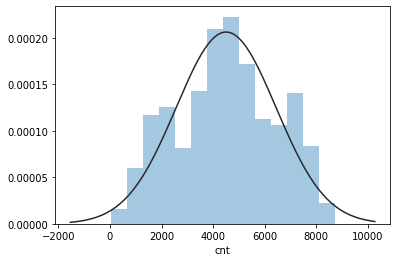

In [57]:
from scipy.stats import norm
sns.distplot(daydata['cnt'],fit=norm,kde=False)

The distribution looks pretty normal

In [58]:
#Converting the date to datetime
daydata['dteday']=daydata['dteday'].apply(pd.to_datetime)

In [59]:
#Describing the stats
daydata.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


From the above stats we can observe the following:

1. Max occurences in season might be of season-3, season might be a bit right skewed as well.
2. Yr has maximum records of yr 1 and this may be right skewed as well.
3. Holiday has maximum instances of no holiday.
4. Max instances in workingday are of 1 which makes sense observing the holiday feature.
5. Casual might be left skewed'
6. Registered might be right skewed.


# 3.2 Exploratory Data Analysis

## 3.2.1`Distribution Plot

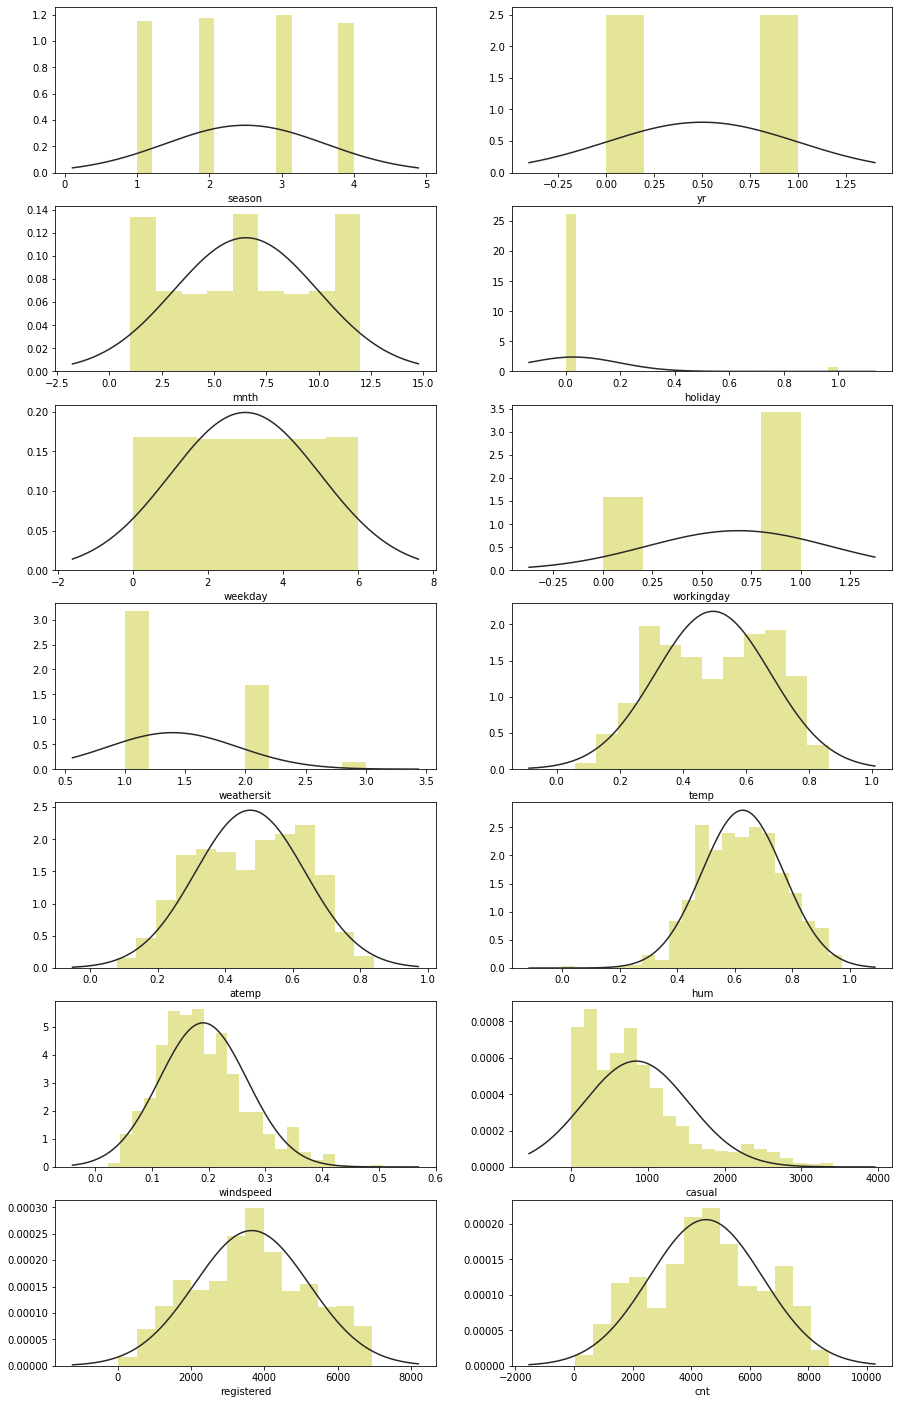

In [60]:
cols=daydata.select_dtypes(exclude=['datetime64[ns]']).columns

def dist_plots(size,cols,data):
    plt.figure(figsize=size)
    for i in range(len(cols)):
        plt.subplot(7,2,i+1)
        sns.distplot(data[cols[i]],color='y',fit=norm,kde=False)
        
dist_plots((15,25),cols,daydata)

Weathersit,windspeed,casual show right skeweness so may be we can transform it later

# 3.2.2. Box Plot

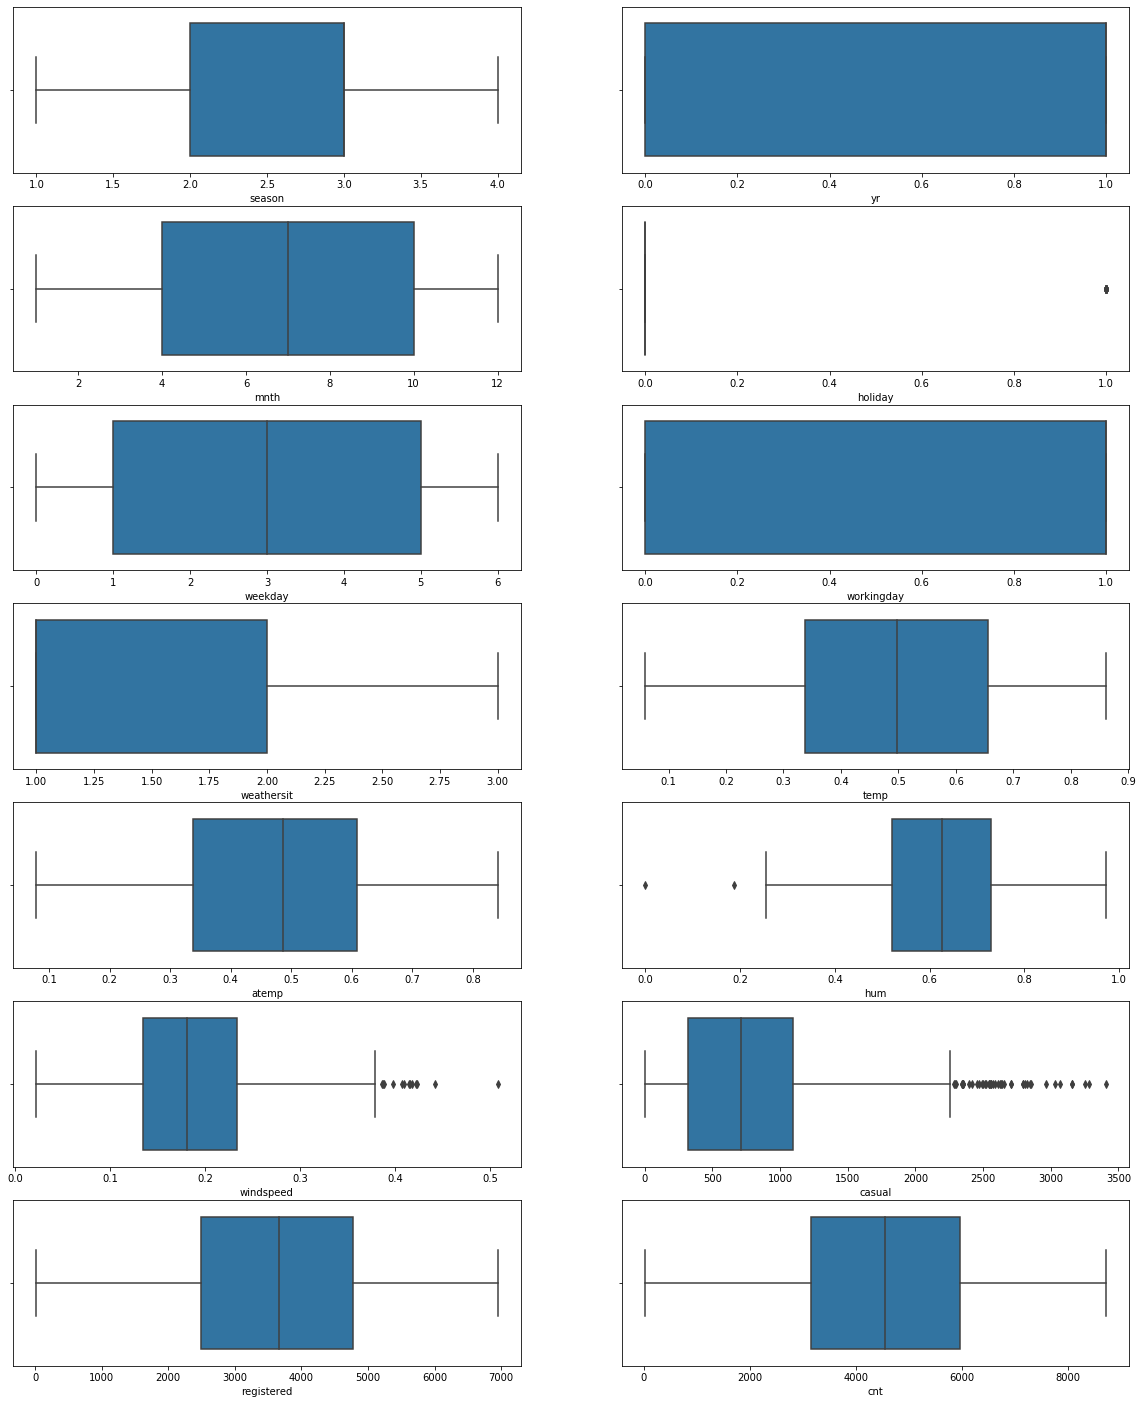

In [61]:
features=daydata.select_dtypes(exclude=['datetime64[ns]']).columns

def box_plots(size,cols,data):
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(7,2,i+1)
        sns.boxplot(x=data[features[i]])
        
        
box_plots((20,25),features,daydata)

Holiday,humidity,windspeed show extreme values so we can check those values out

#### We can estimate the outliers using the IQR range

# 3.2.3. Outlier Detection

In [62]:
cols=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt']

def outlier(col):
    
    #for each in cols:
    stat = daydata[col].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

In [63]:
#For season feature
outlier('season')

count    731.000000
mean       2.496580
std        1.110807
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64
The upper and lower bounds for suspected outliers are 4.5 and 0.5.


##### No outliers outside the boundaries

In [64]:
#For yr feature
outlier('yr')

count    731.000000
mean       0.500684
std        0.500342
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: yr, dtype: float64
The upper and lower bounds for suspected outliers are 2.5 and -1.5.


In [65]:
daydata[(daydata['yr']>2.5)|(daydata['yr']<-1.5)]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


##### No outliers outside the boundaries

In [66]:
#For holiday feature
outlier('holiday')

count    731.000000
mean       0.028728
std        0.167155
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0.


In [67]:
daydata[(daydata['holiday']>0)|(daydata['holiday']<1)]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


#### All of the 1's(i.e holiday days) are detected as potential outliers, it doesn't make any sense to remove them.

In [68]:
#For humidity feature
outlier('hum')

count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: hum, dtype: float64
The upper and lower bounds for suspected outliers are 1.0455212500000002 and 0.20468725.


In [69]:
daydata[(daydata['hum']< 0.20 )]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
68,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623


In [70]:
daydata=daydata[(daydata['hum']> 0.20 )]

In [71]:
outlier('windspeed')

count    729.000000
mean       0.189953
std        0.076662
min        0.022392
25%        0.134950
50%        0.180967
75%        0.233204
max        0.441563
Name: windspeed, dtype: float64
The upper and lower bounds for suspected outliers are 0.380585 and -0.012431000000000025.


In [72]:
#For windspeed feature
daydata=daydata[(daydata['windspeed']<0.44)]

# 3.2.4. Correlation Matrix

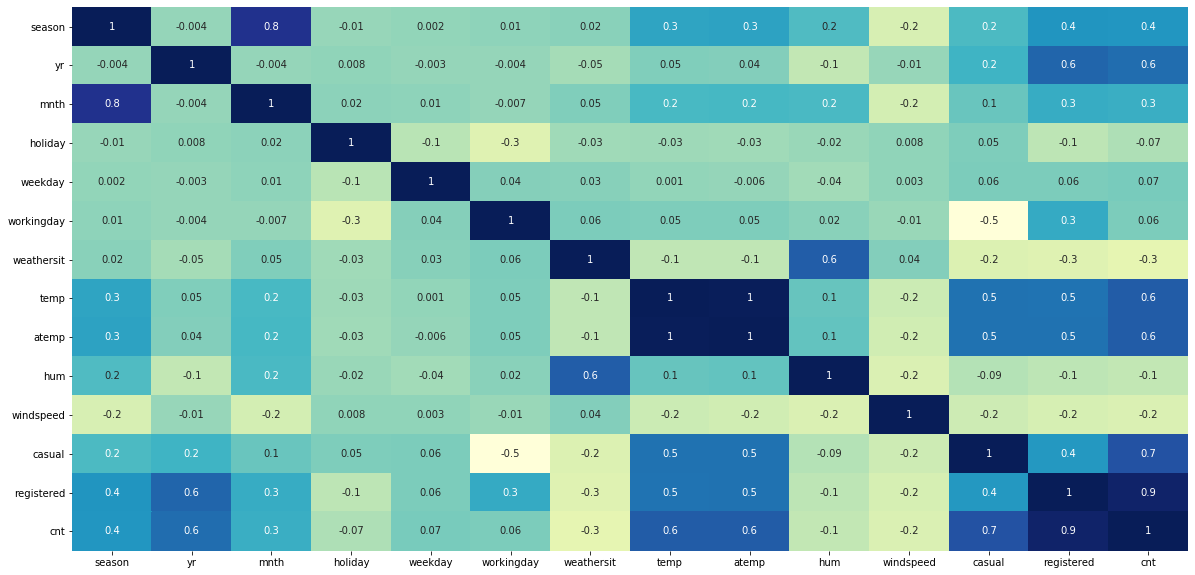

In [73]:
#Cross correlation

def correlation_matrix(data):
    corr=data.corr()
    plt.figure(figsize=(20,10))
    sns.heatmap(corr,annot=True,fmt='.1g',xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap="YlGnBu",cbar=False)

correlation_matrix(daydata)

1. From the above matrix it is clear that the response variable is highly correlated with registeres,casual,temp,atemp,month and year.
2. There also exists multicollinearity amongst the independent features.

# 4. Splitting the data into train test sets

In [74]:
daydata.drop(['dteday',"casual","registered"],inplace=True,axis=1)

In [75]:
#Splitting the data
def split(df):
    
    X,y= df.loc[:,df.columns!='cnt'],df['cnt']
    
    X_train,X_test,y_train,y_test=sklearn_train_test_split(X,y,test_size=0.25,random_state=42)
    
    #Scaling the data
    scaler=StandardScaler()
    scaler.fit(X_train)
    split.transformed_X_train=scaler.transform(X_train)
    split.transformed_X_test= scaler.transform(X_test)
    return X_train,X_test,y_train,y_test

In [76]:
X_train,X_test,y_train,y_test=split(daydata)

# 5.Fitting the baseline model

In [77]:
    
def model(model):
    #Linear regression model
    model= model
    fitted_model=model.fit(X_train,y_train)
    y_pred=fitted_model.predict(X_test)
    r2 = format(r2_score(y_test, y_pred),'.3f')
    rmse = format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f')
    mae = format(mean_absolute_error(y_test, y_pred),'.3f')

    result=pd.DataFrame({'Model':['Baseline_model'],'R-squared':[r2],'RMSE':[rmse],'MAE':[mae]})
    return result


In [78]:
result=model(LinearRegression())

In [79]:
result

,Model,R-squared,RMSE,MAE
0,Baseline_model,0.816,830.602,620.269


Let's see if we can improve the score removing some multicollinearity. 

# 6. Checking for Multicollinearity 

1. VIF = 1 (Not correlated)
2. 1 < VIF < 5 (Moderately correlated)
3. VIF >=5 (Highly correlated)

In [80]:
#Checking for multicollinearity
def multicollinearity():
    X= daydata.loc[:,daydata.columns!='cnt']
    X_vif= X
    print(pd.Series([variance_inflation_factor(X_vif.values,i) for i in range (X_vif.shape[1])],index=X_vif.columns))
    split(daydata)

Due to the high collinearity because of casual and registered columns as casual+registered=cnt and also because of the collinearity in temp and atemp the other features are seeming to have infinite multicollinearity. So, let's first remove casual and registered dependent features and check the multicoliinearity again.

In [81]:
multicollinearity()

season         21.285962
yr              1.959401
mnth           15.251144
holiday         1.100024
weekday         3.089636
workingday      3.278401
weathersit     14.154841
temp          496.663671
atemp         563.979182
hum            30.710185
windspeed       5.402666
dtype: float64


In [82]:
#Removing the highest correlated feature and observing.
daydata.drop('atemp',inplace=True,axis=1)

In [83]:

multicollinearity()

season        21.138228
yr             1.949502
mnth          15.237467
holiday        1.099988
weekday        3.088357
workingday     3.269606
weathersit    13.989521
temp           9.597142
hum           27.753161
windspeed      5.402625
dtype: float64


In [84]:
#Removing humidity as it is the highest correlated factor.
daydata.drop(['hum'],inplace=True,axis=1)

In [85]:
multicollinearity()

season        21.029817
yr             1.949287
mnth          15.055702
holiday        1.093585
weekday        3.071073
workingday     3.228448
weathersit     6.227276
temp           7.797710
windspeed      5.343329
dtype: float64


In [86]:
#Removing season
daydata.drop(['season'],inplace=True,axis=1)

In [87]:
multicollinearity()

yr            1.949038
mnth          4.592991
holiday       1.093173
weekday       3.070474
workingday    3.223029
weathersit    6.181525
temp          6.686536
windspeed     5.342296
dtype: float64


In [88]:
#Removing weathersit
daydata.drop(['weathersit'],inplace=True,axis=1)

In [89]:
multicollinearity()

yr            1.944105
mnth          4.303122
holiday       1.091117
weekday       2.991722
workingday    3.106993
temp          6.557464
windspeed     4.520599
dtype: float64


# 7. Fitting improvised models

In [90]:
#Fitting improvised Linear model

model=LinearRegression()
fitted_model=model.fit(X_train,y_train)
y_pred=fitted_model.predict(X_test)
cv=KFold(n_splits=5,shuffle=True,random_state=1)
score=cross_val_score(model, X_train,y_train, scoring='r2', cv=cv, n_jobs=-1)
scores_2 =cross_val_score(model,X_train,y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print('R2 with cross val: %.3f (%.3f)' % (mean(score)*100, std(score)*100))
print('MSE with cross val: %.3f (%.3f)' % (mean(scores_2)*100, std(scores_2)*100))
r2 = format(r2_score(y_test, y_pred),'.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f')
mae = format(mean_absolute_error(y_test, y_pred),'.3f')
result_2 = pd.DataFrame({'Model':['Improvised_model'],'R-squared':[r2],'RMSE':[rmse],'MAE':[mae]})
result_new = result.append(result_2)
result_new

R2 with cross val: 77.815 (5.008)
MSE with cross val: -81175109.674 (21015093.848)


,Model,R-squared,RMSE,MAE
0,Baseline_model,0.816,830.602,620.269
0,Improvised_model,0.816,830.602,620.269


As we can observe that the baseline and linear regression models give the same results. So, let us see how the RandomForest Regressor performs.

In [91]:
#Random Forest Regressor
model=RandomForestRegressor(n_estimators = 1000,random_state=1233)
fitted_model=model.fit(X_train,y_train)
y_pred=fitted_model.predict(X_test)
cv=KFold(n_splits=5,shuffle=True,random_state=1)
score=cross_val_score(model, X_train,y_train, scoring='r2', cv=cv, n_jobs=-1)
scores_2 =cross_val_score(model,X_train,y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print('R2 with cross val: %.3f (%.3f)' % (mean(score)*100, std(score)*100))
print('MSE with cross val: %.3f (%.3f)' % (mean(scores_2)*100, std(scores_2)*100))
r2 = format(r2_score(y_test, y_pred),'.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f')
mae = format(mean_absolute_error(y_test, y_pred),'.3f')
result_2 = pd.DataFrame({'Model':['Improvised_model'],'R-squared':[r2],'RMSE':[rmse],'MAE':[mae]})
result_new = result.append(result_2)
result_new

R2 with cross val: 87.340 (2.900)
MSE with cross val: -45869952.067 (10625594.179)


,Model,R-squared,RMSE,MAE
0,Baseline_model,0.816,830.602,620.269
0,Improvised_model,0.874,687.352,454.149


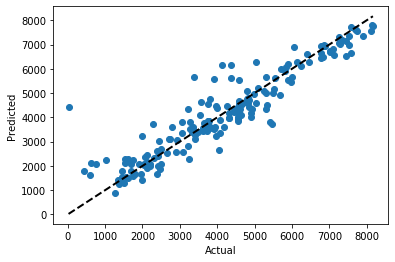

In [92]:
#Checking the linear fit
fig,ax=plt.subplots()

ax.scatter(y_test,y_pred)
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

# 8. Checking for the important features.

In [93]:
def OLS_model(df):
    
    X,y= df.loc[:,df.columns!='cnt'],df['cnt']

    lm=sm.OLS(y,X).fit()
    return lm.summary()

In [94]:
OLS_model(daydata)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              2299.
Date:                Sat, 03 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:19:52   Log-Likelihood:                         -6073.7
No. Observations:                 728   AIC:                                  1.216e+04
Df Residuals:                     721   BIC:                                  1.219e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr          2112.2752     74.538     28.338      0.000    1965.938    2258.613
mnth          84.5369     10.626      7.955      0.000      63.674     105.399
holiday     -488.4535    232.804     -2.098      0.036    -945.508     -31.399
weekday       74.8239     18.189      4.114      0.000      39.115     110.533
workingday   124.0542     80.671      1.538      0.125     -34.325     282.433
temp        6054.3046    183.444     33.004      0.000    5694.157    6414.452
windspeed  -2159.1381    393.926     -5.481      0.000   -2932.517   -1385.760
==============================================================================
Omnibus:                       97.431   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.201
Skew:                          -0.852   Prob(JB):                     2.21e-36
Kurtosis:                       4.585   Cond. No.                         84.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plotting the correlation matrix again to check for collinearity

In [95]:
#Removing workingday as it maybe acting as noice
daydata.drop('workingday',inplace=True,axis=1)

In [96]:
OLS_model(daydata)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              2677.
Date:                Sat, 03 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:19:52   Log-Likelihood:                         -6074.9
No. Observations:                 728   AIC:                                  1.216e+04
Df Residuals:                     722   BIC:                                  1.219e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr          2118.1342     74.511     28.427      0.000    1971.850    2264.418
mnth          86.2354     10.579      8.152      0.000      65.466     107.004
holiday     -567.8947    227.214     -2.499      0.013   -1013.974    -121.815
weekday       77.7697     18.105      4.296      0.000      42.226     113.314
temp        6121.5875    178.318     34.330      0.000    5771.504    6471.671
windspeed  -2014.1650    382.840     -5.261      0.000   -2765.777   -1262.553
==============================================================================
Omnibus:                      104.167   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.950
Skew:                          -0.902   Prob(JB):                     6.21e-39
Kurtosis:                       4.596   Cond. No.                         81.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Associated tasks
**Regression: Predication of bike rental count  daily based on the environmental and seasonal settings.**


# Results

1. The most important factors which influence the renting of bike count as per the analysed data are:

 - year
 - month
 - holiday
 - weekday
 - temp 
 - windspeed



2. The baseline model gives similar results to that of the model after removing multicollinearity which indicates that multicollinearity does not affect the prediction here.



3. Using the baseline model and two different improvised models that is Linear Regression and Random Forest Regressor, the latter fits the data 6.6% better and has predicting ability with less errors via RandomForest Regressor. We have achived 17.24% efficiency in RMSE and 26.78% efficiency in MAE by using the RandomForest Regressor.



4. Using Random Forest Regressor we would better be able to predict the daily rental count of the bikes.